Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 8374.3789 - r2: -2.0910 - val_loss: 6635.2886 - val_r2: -0.5596
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 5502.9131 - r2: -0.2725 - val_loss: 7173.1934 - val_r2: -1.3651
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 5040.0176 - r2: -0.7510 - val_loss: 6260.4258 - val_r2: -0.4322
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 4766.4780 - r2: -0.6912 - val_loss: 6119.2334 - val_r2: -0.4414
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 4320.3521 - r2: 0.0210 - val_loss: 6027.7744 - val_r2: -0.5766
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 3965.9368 - r2: 0.2867 - val_loss: 5756.3901 - val_r2: -0.4850
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 3683.0925 - r2: 0.3166 - val_loss: 5224.4346 - val_r2: -0.0717
Epoch 8/50
20/20 [==============================] 

loss        2690.970947
r2             0.647659
val_loss    4460.596680
val_r2         0.000753
Name: 26, dtype: float64

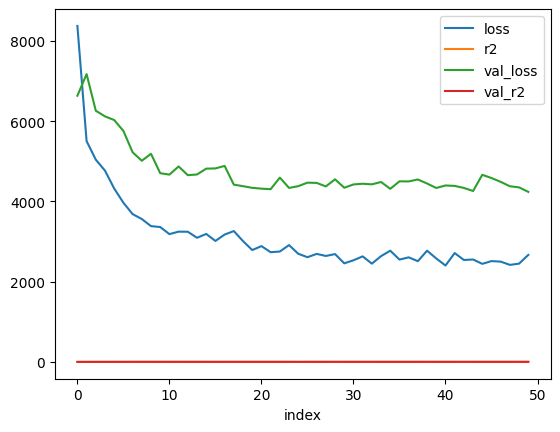

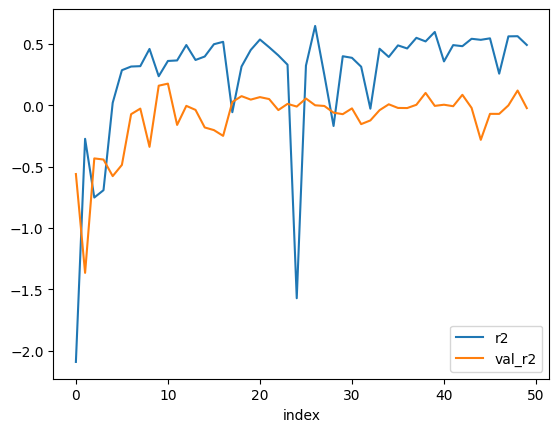

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
#Importing the data
df = pd.read_csv('/content/drive/MyDrive/CSV Files/Car Prices.csv')
df = pd.get_dummies(df)
x = df.drop(['price'],axis=1)
y = df.price
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
#r2
from keras import backend as k
def r2(y_true,y_pred):
    ss_res = k.sum(k.square(y_true-y_pred))
    ss_tot = k.sum(k.square(y_true-k.mean(y_true)))
    return (1-ss_res/(ss_tot))
#Model creation and compilation
model = Sequential()
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=[r2])
hist = model.fit(x_train,y_train,epochs=50, batch_size=5, validation_split=0.3)
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')
pd.DataFrame(model.history.history)[['r2','val_r2']].reset_index().plot('index', kind='line')
data = pd.DataFrame(hist.history)
data.loc[data['r2'].idxmax()]